# Data manipulation and analysis
A stronger interaction

##Pandas
**Pan**el **Da**ta **S**ystem 


- Python data analysis library 
- Built on top of Numpy 
- Open Sourced by AQR Capital Management, LLC in late 2009
- 30.000 lines of tested Python/Cython code 
- Used in production by many companies

In [2]:
from IPython.core.display import HTML
HTML("<iframe src=http://pandas.pydata.org width=800 height=450></iframe>")

Level up

In [1]:
# Climbing the pydata stack
import pandas as pd

Now we can do [**#kungfupandas**]()

<img src='http://j.mp/1Ixu8eH' width=400>


## Kung fu get

<img src='http://www.scicbeijing.com/Upfile/20091130015525774.jpg' width='400'>

###Read a file

Define files and the number of columns to be read

In [2]:
datafile = 'data/num.csv.gz'
infofile = 'data/num.csv.info'
cols_num = 3

Read columns from information file

In [3]:
cols_name = []
with open(infofile) as f:
    for row in f.read().splitlines():
        cols_name.append(row.split()[0])

print cols_name

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type', 'Cover_Type']


Read the file with pandas!

In [4]:
# if you need help 
?pd.read_csv

In [5]:
A = pd.read_csv(datafile, \
    header=None, \
    names=cols_name[0:cols_num], \
    usecols=range(0, cols_num))

### Now you have a DataFrame

In [6]:
type(A)

pandas.core.frame.DataFrame

In [7]:
A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71436 entries, 0 to 71435
Data columns (total 3 columns):
Elevation    71436 non-null int64
Aspect       71436 non-null int64
Slope        71436 non-null int64
dtypes: int64(3)
memory usage: 2.2 MB


<small>Note: we get memory usage!</small>

In [8]:
# First five lines
A.head()

,Elevation,Aspect,Slope
0,2596,51,3
1,2590,56,2
2,2804,139,9
3,2785,155,18
4,2595,45,2


In [9]:
#Last five lines
A.tail()

,Elevation,Aspect,Slope
71431,2919,78,8
71432,2912,97,6
71433,2911,207,1
71434,2912,74,3
71435,2910,72,5


# DATA FRAMES

* A table-like data structure
* Commands for user to interact and modify the structure

* They can be compared with *R language* and **data.table** class
    - Basically a pythonic *data frame*
    - but with automatic data alignment!
    - Arithmetic operations align on row and column labels

## Kung fu columns
selecting and examining columns

<img src='http://j.mp/1dseP9b' width=400>

###Axis Indexing 

- Every axis has an index
- Highly optimized data structure
- Hierarchical indexing
- group by and join-type operations

<small>You will understand this by examples</small>

### Summarize all columns

In [10]:
A.describe()
# Only for numeric columns

,Elevation,Aspect,Slope
count,71436.000000,71436.000000,71436.000000
mean,2862.476678,138.018450,12.245129
std,256.034333,105.152815,6.925558
min,1863.000000,0.000000,0.000000
25%,2717.000000,53.000000,7.000000
50%,2903.000000,108.000000,11.000000
75%,3014.000000,206.000000,16.000000
max,3849.000000,360.000000,61.000000


In [11]:
# Select one column using the DataFrame attribute
A.Aspect[:4]

0     51
1     56
2    139
3    155
Name: Aspect, dtype: int64

In [12]:
# Select one column in a better way
index = 'Aspect'
A[index].head(4)

0     51
1     56
2    139
3    155
Name: Aspect, dtype: int64

In [13]:
# Wait... What type is a column?
type(A[index])

pandas.core.series.Series

# Series
One-dimensional ndarray with axis labels

<img src='http://j.mp/1dseCmG' width=300>

A Series is a single vector of data (like a NumPy array) 

with an **index** that *labels* each element in the vector

In [14]:
# Make a Series
S = pd.Series([632, 1638, 569, 115])
S

0     632
1    1638
2     569
3     115
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. 

A NumPy array comprises the values of the Series, while the index is a pandas Index object.

In [15]:
S.values

array([ 632, 1638,  569,  115])

In [16]:
S.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [17]:
# describe the Series (non-numeric)
A[index].describe()

count    71436.000000
mean       138.018450
std        105.152815
min          0.000000
25%         53.000000
50%        108.000000
75%        206.000000
max        360.000000
Name: Aspect, dtype: float64

### Name what you see

We can assign meaningful labels to the index, if they are available

In [18]:
bacteria = pd.Series([632, 1638, 569, 115], 
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

In [19]:
# Now it looks more like a dictionary
bacteria['Actinobacteria']

569

In [20]:
# In fact we can create it from a dict
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, \
    'Actinobacteria': 569, 'Bacteroidetes': 115}
pd.Series(bacteria_dict)

Actinobacteria     569
Bacteroidetes      115
Firmicutes         632
Proteobacteria    1638
dtype: int64

<small>Note: in this case the Series is created in key-sorted order</small>

In [21]:
# We can give both the array of values and the index 
# meaningful labels themselves

bacteria.name = 'counts'
bacteria.index.name = 'phylum'

bacteria

phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [22]:
import numpy as np
np.log(bacteria)

phylum
Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
Name: counts, dtype: float64

### The truth about Series
Booleans mask

In [23]:
for name in bacteria.index:
    print name.endswith('bacteria')

False
True
True
False


In [24]:
mask = [name.endswith('bacteria') for name in bacteria.index]
mask

[False, True, True, False]

In [25]:
bacteria[mask]

phylum
Proteobacteria    1638
Actinobacteria     569
Name: counts, dtype: int64

## Find what is missing

If we pass a custom index to Series

it will select the corresponding values from the dict

In [26]:
bacteria2 = pd.Series(bacteria_dict, \
        index=['Cyanobacteria','Firmicutes','Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria      NaN
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
dtype: float64

Indices without corresponding values are treat as **missing**

Pandas uses the NaN (not a number) type for missing values

In [27]:
# Find what is missing
bacteria2.isnull()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

The labels are used to **align** data when used in operations with other Series

In [28]:
bacteria + bacteria2

Actinobacteria    1138
Bacteroidetes      NaN
Cyanobacteria      NaN
Firmicutes        1264
Proteobacteria    3276
dtype: float64

- Contrast this with NumPy arrays
    * where arrays of the same length will combine values element-wise
- Adding Series combined values with the same label in the resulting series
    * Notice also that *the missing values were propogated* by addition

<hr>

## Back to *Kung fu columns*
selecting and examining columns inside a dataframe

In [29]:
# Limit table output size
pd.set_option('max_rows', 5)

In [30]:
A

,Elevation,Aspect,Slope
0,2596,51,3
1,2590,56,2
...,...,...,...
71434,2912,74,3
71435,2910,72,5


In [31]:
type(A)

pandas.core.frame.DataFrame

In [32]:
index

'Aspect'

In [33]:
type(A[index])

pandas.core.series.Series

In [34]:
# For each value, count number of occurrences
A[index].value_counts()

45     1366
90      931
       ... 
226      19
360       5
dtype: int64

### EXERCISE

Produce the top three most used values

### EXERCISE

The name of the column having the most high 75% value of the whole dataset

In [35]:
# A list of columns
my_cols = ['Elevation', 'Slope']
print A[my_cols].head(2)
print

# Types?
print "t1", type(A[index])
print "t2", type(A[my_cols])

   Elevation  Slope
0       2596      3
1       2590      2

t1 <class 'pandas.core.series.Series'>
t2 <class 'pandas.core.frame.DataFrame'>


## Kungfu approach 1
Focus on one opponent at the time

<img src='http://i.ytimg.com/vi/9DW-ZDT2CwY/maxresdefault.jpg' width=500>

For each unique value in column `index`

calculate mean of *ALL* other <u>numeric</u> columns

In [36]:
A.groupby(index).mean()

,Elevation,Slope
Aspect,,
0,2931.376430,8.051487
1,2764.614815,15.296296
...,...,...
359,2781.500000,16.180851
360,2460.800000,29.800000


In [37]:
# Minimum value of a single column
A.groupby(index).mean().Elevation.min() 
#note: accessing by attribute works here too

2460.8000000000002

<img src='http://themamareport.com/wp-content/uploads/2013/06/kung-fu-image-still.jpg' width='450'>
<small> You may have noticed: *chainability*</small>

In [38]:
A.groupby(index).Elevation.mean()

Aspect
0      2931.376430
1      2764.614815
          ...     
359    2781.500000
360    2460.800000
Name: Elevation, dtype: float64

## Kungfu approach 2
Transform the strength of one opponent in your strength

<img src='http://www.shaolin.org/images/taijiquan/com_22c.jpg' width=400>

Add a new column as a function of existing columns

In [39]:
A['new_col1'] = A.Elevation * 10
A['new_col2'] = A['Slope'] + A['Aspect'] - 1
# Check it
A

,Elevation,Aspect,Slope,new_col1,new_col2
0,2596,51,3,25960,53
1,2590,56,2,25900,57
...,...,...,...,...,...
71434,2912,74,3,29120,76
71435,2910,72,5,29100,76


<small>note: can't (usually) **assign** to an attribute 

(e.g., `A.new_col`)</small>

In [40]:
# rename a column
A.rename(columns={'new_col2':'a_sum'}, inplace=True)
A

,Elevation,Aspect,Slope,new_col1,a_sum
0,2596,51,3,25960,53
1,2590,56,2,25900,57
...,...,...,...,...,...
71434,2912,74,3,29120,76
71435,2910,72,5,29100,76


## Kung fu approach 3
Make your opponent see what you want him to see

<img src='http://funnystatus.socialzoidllc.netdna-cdn.com/wp-content/uploads/2013/06/hiding-panda.png' width=400>

In [41]:
# Hide a column (temporarily)
A.drop(['new_col1'], axis=1)

,Elevation,Aspect,Slope,a_sum
0,2596,51,3,53
1,2590,56,2,57
...,...,...,...,...
71434,2912,74,3,76
71435,2910,72,5,76


<small>hint: use 'axis=0' to drop rows instead</small>

Alternative way: **slice** 'columns' attribute like a <u>list</u>!

In [42]:
A[A.columns[:-2]]

,Elevation,Aspect,Slope
0,2596,51,3
1,2590,56,2
...,...,...,...
71434,2912,74,3
71435,2910,72,5


A more violent approach: delete a column **permanently**

In [43]:
# E.g. if you need memory
del A['new_col1']

## Kung fu knows opponent charateristics
before touching him

In [ ]:
A.columns              # column names (which is "an index")
A.dtypes               # data types of each column
A.shape                # number of rows and columns
A.values               # underlying numpy array

# ... and many more: just write A. [and press TAB]

# Filtering

<img src='https://tcrf.net/images/8/81/Dd3NES_player_select.png'>

In [44]:
# Filter rows based on column values
A[A[index] < 20]

,Elevation,Aspect,Slope,a_sum
18,2504,0,4,3
58,2489,11,4,14
...,...,...,...,...
71329,2972,6,14,19
71333,2952,17,12,28


Advanced logical filtering

In [45]:
# use multiple conditions
condition = (A.Elevation < 2400) & (A.Slope == 17)
cols = ['Slope', 'Aspect']
A[condition][cols]

,Slope,Aspect
1820,17,344
1825,17,50
...,...,...
13555,17,287
15007,17,107


<small>Note: `AND` and `OR` do not work inside data frame conditions</small>

In [46]:
# Filter specific values
B = A[A[index].isin([13,17])]
B

,Elevation,Aspect,Slope,a_sum
67,2919,13,13,25
91,2788,13,16,28
...,...,...,...,...
71312,3047,13,13,25
71333,2952,17,12,28


In [47]:
len(B)

602

## Kung fu reverse
Filtering on rows instead of columns

<img src='https://s-media-cache-ak0.pinimg.com/236x/59/d3/ce/59d3ce8e901e366b7c89f137c6967c7f.jpg'>

In [48]:
# Wait, how do i get the third row
A[2]

KeyError: 2

In [49]:
# Get single row
A.loc[2]

Elevation    2804
Aspect        139
Slope           9
a_sum         147
Name: 2, dtype: int64

In [50]:
# Slice of rows
A.loc[0:2]

,Elevation,Aspect,Slope,a_sum
0,2596,51,3,53
1,2590,56,2,57
2,2804,139,9,147


In [51]:
# Slice of columns too ;)
A.loc[2:4, 'Elevation':'Slope']

,Elevation,Aspect,Slope
2,2804,139,9
3,2785,155,18
4,2595,45,2


`:` is a range, `,` is a list

In [52]:
A.loc[[2,4], ['Elevation','Slope']]

,Elevation,Slope
2,2804,9
4,2595,2


In [53]:
# iloc only use integer as position
A.iloc[[2,4],[0,2]]

,Elevation,Slope
2,2804,9
4,2595,2


But...

In [54]:
# Get single row
A.ix[2]

Elevation    2804
Aspect        139
Slope           9
a_sum         147
Name: 2, dtype: int64

> `.ix` supports mixed integer and label based access

source: http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing

# Kung conFusion

We want to understand better

In [55]:
def docline(obj):
        print str(type(obj)) + ":\t" + obj.__doc__.split('\n')[0]

In [56]:
docline(A.loc)
docline(A.iloc)
docline(A.ix)
docline(A.at)
docline(A.iat)

<class 'pandas.core.indexing._LocIndexer'>:	Purely label-location based indexer for selection by label.
<class 'pandas.core.indexing._iLocIndexer'>:	Purely integer-location based indexing for selection by position.
<class 'pandas.core.indexing._IXIndexer'>:	A primarily label-location based indexer, with integer position
<class 'pandas.core.indexing._AtIndexer'>:	Fast label-based scalar accessor
<class 'pandas.core.indexing._iAtIndexer'>:	Fast integer location scalar accessor.


In [57]:
pos = 2

for indexer in [A.loc, A.iloc, A.ix, A[index].at, A[index].iat]:
    print indexer[pos]
    print ""


Elevation    2804
Aspect        139
Slope           9
a_sum         147
Name: 2, dtype: int64

Elevation    2804
Aspect        139
Slope           9
a_sum         147
Name: 2, dtype: int64

Elevation    2804
Aspect        139
Slope           9
a_sum         147
Name: 2, dtype: int64

139

139



Index:
- loc: only works on index
- iloc: works on position
- ix: you can get data from dataframe without this to be in the index

Scalar:
- at: get scalar values; a very fast loc
- iat: Get scalar values; a very fast iloc

# Kung fu order

<img src='http://product_images_y.s3.amazonaws.com/un-sp-15/product/full/un-sp-15.jpg' width=500>

Sort things out

In [58]:
# Sort rows by label
A.sort_index()

,Elevation,Aspect,Slope,a_sum
0,2596,51,3,53
1,2590,56,2,57
...,...,...,...,...
71434,2912,74,3,76
71435,2910,72,5,76


In [59]:
# Sort rows by a specific column
A.sort_index(by=index)

,Elevation,Aspect,Slope,a_sum
65052,2982,0,9,8
35524,3031,0,13,12
...,...,...,...,...
2343,2062,360,30,389
12204,2046,360,29,388


In [60]:
# Only works for a Series
A[index].order()

65052      0
35524      0
        ... 
2343     360
12204    360
Name: Aspect, dtype: int64

In [61]:
# Use descending order instead
A.sort_index(by=index, ascending=False)

,Elevation,Aspect,Slope,a_sum
15816,2673,360,35,394
12204,2046,360,29,388
...,...,...,...,...
32479,2919,0,9,8
46484,3041,0,9,8


In [62]:
# Sort by multiple columns
A.sort_index(by=['Slope', 'Elevation'])

,Elevation,Aspect,Slope,a_sum
16889,2494,180,0,179
17727,2554,45,0,44
...,...,...,...,...
16251,2736,178,61,238
16252,2736,174,61,234


# So far

- Check data before getting started
- Choose columns by label or index
- Filter rows on index and values
- Group by
- Sort

<small>note: just like *databases*</small>

<small>hint: we can do better</small>

# Unique is what we are
Find what is duplicated

In [63]:
# Series of booleans (True if a row is identical to a previous row)
A.duplicated()

0        False
1        False
         ...  
71434    False
71435    False
dtype: bool

In [64]:
# Count duplicates
A.duplicated().sum()

3229

In [65]:
A.duplicated?

In [66]:
# Find the duplicate with minimum elevation value
A[A.duplicated()].sort_index(by='Elevation').head(1)

,Elevation,Aspect,Slope,a_sum
3426,2331,185,15,199


In [67]:
# Check if it really is a duplicate
A[(A.Elevation==2331) & (A.Aspect==185)]

,Elevation,Aspect,Slope,a_sum
3328,2331,185,15,199
3426,2331,185,15,199


**Fighting the dark forces**

In [68]:
pd.set_option('max_rows', 0)
# Drop duplicate rows
A.drop_duplicates().describe()

,Elevation,Aspect,Slope,a_sum
count,68207.00000,68207.000000,68207.000000,68207.000000
mean,2857.45271,138.797220,12.415119,150.212339
std,259.48115,105.456545,6.975805,106.048039
min,1863.00000,0.000000,0.000000,-1.000000
25%,2711.00000,54.000000,7.000000,65.000000
50%,2893.00000,108.000000,11.000000,120.000000
75%,3014.00000,207.000000,16.000000,218.000000
max,3849.00000,360.000000,61.000000,397.000000


more syntax

In [ ]:
# check a single column for duplicates
A.col_name1.duplicated()

# specify columns for finding duplicates
A.duplicated(['col_name1', 'col_name2', 'col_name3'])

# The index

In [ ]:
# Use a different example dataset
baseball = pd.read_csv("https://raw.githubusercontent.com/fonnesbeck/statistical-analysis-python-tutorial/master/data/baseball.csv", index_col='id')

In [100]:
pd.set_option('max_columns', 10)
baseball.head()

,player,year,stint,team,lg,...,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,...,0,0,3,0,0
88643,schilcu01,2006,1,BOS,AL,...,0,0,0,0,0
88645,myersmi01,2006,1,NYA,AL,...,0,0,0,0,0
88649,helliri01,2006,1,MIL,NL,...,0,0,0,0,0
88650,johnsra05,2006,1,NYA,AL,...,0,0,0,0,0


##Reindexing

Reindexing allows users to manipulate the data labels in a DataFrame

In [107]:
# Alter the order of the rows
baseball.reindex(baseball.index[::-1]).head()

,player,year,stint,team,lg,...,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,
89534,alomasa02,2007,1,NYN,NL,...,0,0,0,0,0
89533,aloumo01,2007,1,NYN,NL,...,5,2,0,3,13
89530,ausmubr01,2007,1,HOU,NL,...,3,6,4,1,11
89526,benitar01,2007,1,SFN,NL,...,0,0,0,0,0
89525,benitar01,2007,2,FLO,NL,...,0,0,0,0,0


In [109]:
# Let's try all the possible keys
cols = ['player','year','team']
id_range = range(baseball.index.values.min(), baseball.index.values.max())
baseball[cols].reindex(id_range).head()

,player,year,team
id,,,
88641,womacto01,2006,CHN
88642,NaN,NaN,NaN
88643,schilcu01,2006,BOS
88644,NaN,NaN,NaN
88645,myersmi01,2006,NYA


In [116]:
# Fill the blanks
baseball.reindex(id_range, fill_value='MR Unknown', columns=['player']).head()

,player
id,
88641,womacto01
88642,MR Unknown
88643,schilcu01
88644,MR Unknown
88645,myersmi01


In [110]:
# In different methods
baseball[cols].reindex(id_range, method='ffill', columns=['player','year']).head()

,player,year
id,,
88641,womacto01,2006
88642,womacto01,2006
88643,schilcu01,2006
88644,schilcu01,2006
88645,myersmi01,2006


##Mutiple index

If you are feeling forced to combine fields 
- to obtain a unique index 
    * that was not simply an integer value
    
A more elegant way is to create a **hierarchical index** from fields

In [101]:
baseball_h = baseball.set_index(['year', 'team', 'player'])
baseball_h.head(10)

stint  lg   g  ab  r  ...   ibb  hbp  sh  sf  gidp
year team player                           ...                         
2006 CHN  womacto01      2  NL  19  50  6  ...     0    0   3   0     0
     BOS  schilcu01      1  AL  31   2  0  ...     0    0   0   0     0
...                    ...  ..  ..  .. ..  ...   ...  ...  ..  ..   ...
2007 ATL  francju01      2  NL  15  40  1  ...     1    0   0   1     1
     NYN  francju01      1  NL  40  50  7  ...     0    0   0   1     1

[10 rows x 19 columns]

In [103]:
baseball_h.index.is_unique

True

In [104]:
# This player has signed for two different teams in the same year
baseball_h.ix[(2007, 'ATL', 'francju01')]

stint     2
lg       NL
         ..
sf        1
gidp      1
Name: (2007, ATL, francju01), dtype: object

# I/O

## Snapshot
Quicly write the current status of a DataFrame to a CSV

In [70]:
csvfile = 'my_file.csv'

In [71]:
A.to_csv(csvfile)
# Warning: index is used as first column
!head {csvfile}

,Elevation,Aspect,Slope,a_sum
0,2596,51,3,53
1,2590,56,2,57
2,2804,139,9,147
3,2785,155,18,172
4,2595,45,2,46
5,2579,132,6,137
6,2606,45,7,51
7,2605,49,4,52
8,2617,45,9,53


In [72]:
# Better to ignore the index column!
A.to_csv(csvfile, index=False)
!head {csvfile}

Elevation,Aspect,Slope,a_sum
2596,51,3,53
2590,56,2,57
2804,139,9,147
2785,155,18,172
2595,45,2,46
2579,132,6,137
2606,45,7,51
2605,49,4,52
2617,45,9,53


## Reading from a remote source

In [30]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


## Reading from Excel

> Since so much financial and scientific data ends up in Excel spreadsheets (*regrettably*), Pandas' ability to directly import Excel spreadsheets is **valuable**. 

<small>Warning: This support is contingent on having dependencies installed: `xlrd` and `openpyxl`</small>

<small>Note: Don't forget to use standards and open formats</small>

Our file

In [73]:
xlsfile = 'data/output.xlsx'

Write from a Dataframe

In [74]:
writer = pd.ExcelWriter(xlsfile)
A[:2500].to_excel(writer,'Sheet1')
writer.save()

Read the xls file

In [75]:
B = pd.read_excel(xlsfile, sheetname='Sheet1')
B.head()

,Elevation,Aspect,Slope,a_sum
0,2596,51,3,53
1,2590,56,2,57
2,2804,139,9,147
3,2785,155,18,172
4,2595,45,2,46


## Kung fu is full power

Dare to receive any data

In [76]:
data = pd.DataFrame({0: {'patient': 1, 'phylum': 'Firmicutes', 'value': 632},
                    1: {'patient': 1, 'phylum': 'Proteobacteria', 'value': 1638},
                    2: {'patient': 1, 'phylum': 'Actinobacteria', 'value': 569},
                    3: {'patient': 1, 'phylum': 'Bacteroidetes', 'value': 115},
                    4: {'patient': 2, 'phylum': 'Firmicutes', 'value': 433},
                    5: {'patient': 2, 'phylum': 'Proteobacteria', 'value': 1130},
                    6: {'patient': 2, 'phylum': 'Actinobacteria', 'value': 754},
                    7: {'patient': 2, 'phylum': 'Bacteroidetes', 'value': 555}})

In [77]:
data

,0,1,2,3,4,5,6,7
patient,1,1,1,1,2,2,2,2
phylum,Firmicutes,Proteobacteria,Actinobacteria,Bacteroidetes,Firmicutes,Proteobacteria,Actinobacteria,Bacteroidetes
value,632,1638,569,115,433,1130,754,555


In [78]:
data = data.T
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


# Full power is being cautious

In [79]:
# Take a Subseries and modify
vals = data.value
vals[5] = 0
vals

0     632
1    1638
2     569
3     115
4     433
5       0
6     754
7     555
Name: value, dtype: object

*Oooops*

In [80]:
data.loc[5]

patient                 2
phylum     Proteobacteria
value                   0
Name: 5, dtype: object

<small>hint: just like numpy</small>

In [81]:
# Deep copy
vals = data.value.copy()
vals[5] = 1000
data.loc[5]

patient                 2
phylum     Proteobacteria
value                   0
Name: 5, dtype: object

# Plots

In [82]:
%matplotlib inline
import matplotlib.pyplot as plt

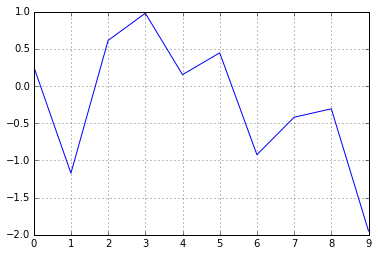

In [83]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

# Level up

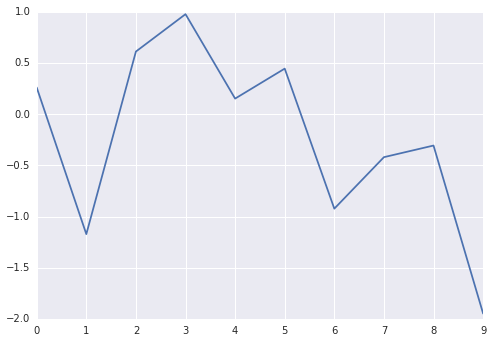

In [84]:
import seaborn as sns
normals.plot()

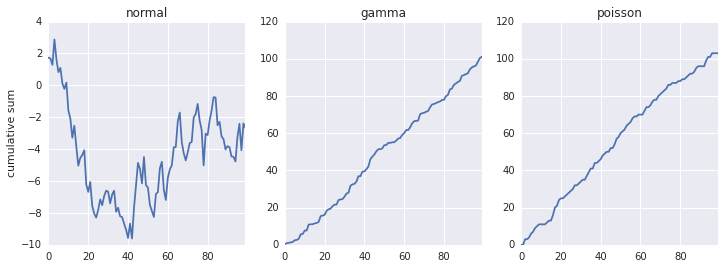

In [89]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(['normal','gamma','poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)
axes[0].set_ylabel('cumulative sum')

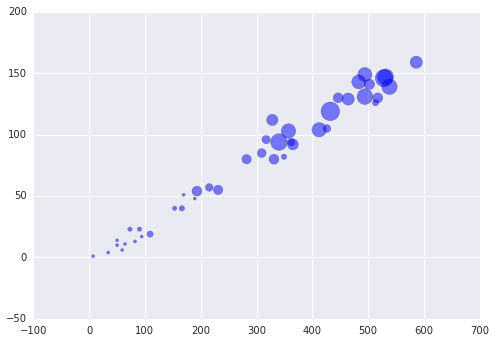

In [118]:
plt.scatter(baseball.ab, baseball.h, s=baseball.hr*10, alpha=0.5)

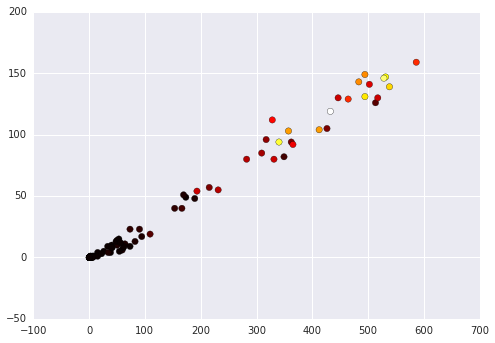

In [119]:
plt.scatter(baseball.ab, baseball.h, c=baseball.hr, s=40, cmap='hot')

# Comparison

Pandas is trying to cover the gap between python and R

to fill...

http://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html

## Kungfu requires continuous training
...and meditation

<img src='http://j.mp/1KWt1pb' width=600>

- Pandas is a very powerful and sometimes complex framework
    - The [cookbook](http://pandas.pydata.org/pandas-docs/stable/pandas.pdf) is > 1600 pages!
- Many operations
    - Some operations can be optained in different but equivalent ways

> Be still, like water

## FIX

# Time is difficult